In [1]:
%load_ext autoreload
%load_ext autotime

time: 314 µs (started: 2023-09-24 16:27:44 -07:00)


In [2]:
import os
import sys
import warnings
wisio_dir = os.path.abspath("../../")
sys.path.append(wisio_dir)
warnings.filterwarnings('ignore')

time: 720 µs (started: 2023-09-24 16:27:44 -07:00)


In [3]:
import csv
import dask
import dask.dataframe as dd
import json
import numpy as np
import pandas as pd
print('pandas', pd.__version__)
print('dask', dask.__version__)
print('numpy', np.__version__)

pandas 1.5.3
dask 2022.12.1
numpy 1.21.0
time: 2.79 s (started: 2023-09-24 16:27:44 -07:00)


In [4]:
%autoreload 2

from wisio.recorder import RecorderAnalyzer

def init_analyzer(force_local: bool = True):
    return RecorderAnalyzer(
        cluster_manager_args=dict(
            force_local=force_local,
            cluster_settings=dict(
                cores=8,
                dashboard_port=3676,
                local_directory="/var/tmp/wisio-recorder-mpv",
                log_file="%J.log",
                worker_queue="pdebug"
            )
        ),
        working_dir='.recorder',
        debug=True
    )


time: 1.45 s (started: 2023-09-24 16:27:47 -07:00)


In [5]:
analyzer = init_analyzer()

time: 2.51 s (started: 2023-09-24 16:27:48 -07:00)


In [6]:
client = analyzer.cluster_manager.clients[0]
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://192.168.137.2:3676/status,
Dashboard: http://192.168.137.2:3676/status,Workers: 8
Total threads: 40,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://192.168.137.2:44121,Workers: 8
Dashboard: http://192.168.137.2:3676/status,Total threads: 40
Started: Just now,Total memory: 0 B
Comm: tcp://192.168.137.2:36923,Total threads: 5
Dashboard: http://192.168.137.2:41205/status,Memory: 0 B
Nanny: tcp://192.168.137.2:37103,


time: 55.3 ms (started: 2023-09-24 16:27:51 -07:00)


In [15]:
log_dirs = {
    'CM1': '/p/vast1/iopp/recorder_app_logs/cm1/nodes-32/workflow-4/_parquet',
    'HACC': '/p/vast1/iopp/recorder_app_logs/hacc/nodes-32/workflow-0/_parquet',
    'Flash': '/p/vast1/iopp/recorder_app_logs/flash_sedov3d_hdf5/_parquet',
    # 'lbann-jag': '/p/gpfs1/iopp/recorder_app_logs/lbann-jag/nodes-32/_parquet',
    'Montage': '/p/vast1/iopp/recorder_app_logs/montage/nodes-32/_parquet',
    'Montage-P': '/p/vast1/iopp/recorder_app_logs/montage_pegasus/nodes-32/_parquet',
    # 'mummi-wemul': '/p/gpfs1/iopp/recorder_app_logs/mummi-wemul/nodes-32-ppn-32/_parquet',
}
log_dirs

{'CM1': '/p/vast1/iopp/recorder_app_logs/cm1/nodes-32/workflow-4/_parquet',
 'HACC': '/p/vast1/iopp/recorder_app_logs/hacc/nodes-32/workflow-0/_parquet',
 'Flash': '/p/vast1/iopp/recorder_app_logs/flash_sedov3d_hdf5/_parquet',
 'Montage': '/p/vast1/iopp/recorder_app_logs/montage/nodes-32/_parquet',
 'Montage-P': '/p/vast1/iopp/recorder_app_logs/montage_pegasus/nodes-32/_parquet'}

time: 3.65 ms (started: 2023-09-24 16:36:53 -07:00)


### Slope Analysis

In [16]:
metrics = ['duration']

time: 671 µs (started: 2023-09-24 16:36:55 -07:00)


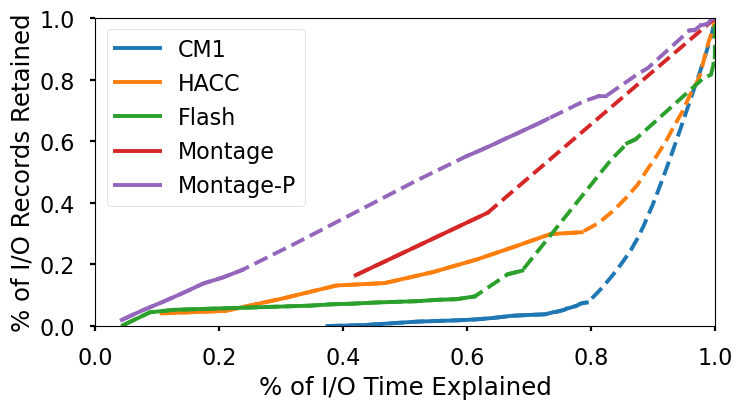

time: 1min 21s (started: 2023-09-24 16:36:59 -07:00)


In [17]:
%autoreload 2

import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.lines import Line2D

plt.style.use('seaborn-poster')
legends = []

fig, ax = plt.subplots(figsize=(8, 4))

for i, (app, log_dir) in enumerate(log_dirs.items()):
    for metric in metrics:
        result = analyzer.analyze_parquet(
            log_dir=log_dir,
            checkpoint=False,
            metrics=metrics,
        )
        result.plot.slope(
            metric=metric,
            view_keys=[('time_range',)],
            ax=ax,
            xlabel='% of I/O Time Explained',
            ylabel='% of I/O Records Retained',
            color=f"C{i}"
        )
        legends.append(Line2D([0], [0], color=f"C{i}", label=app))

ax.legend(handles=legends)

### Relationships

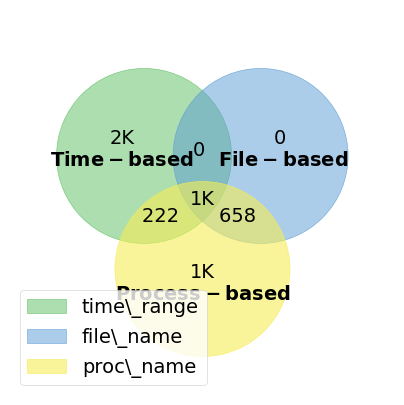

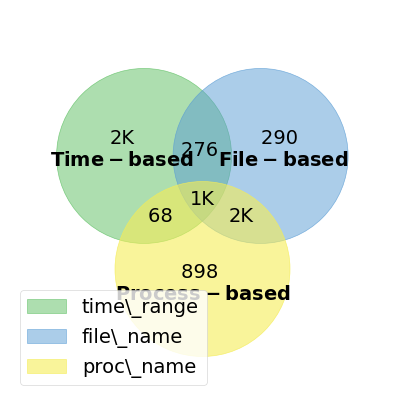

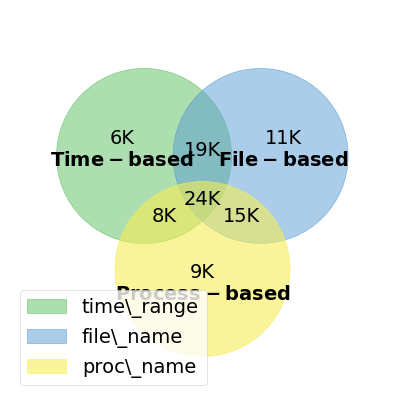

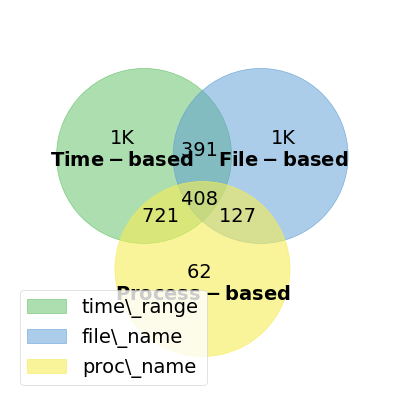

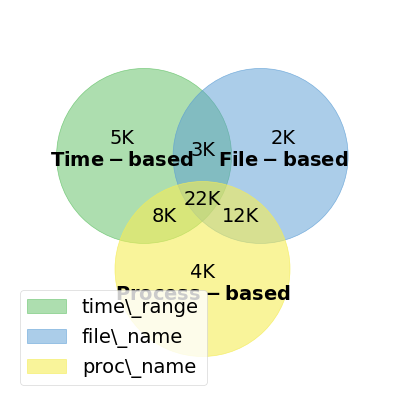

time: 1min 25s (started: 2023-09-24 16:45:12 -07:00)


In [18]:
for i, (app, log_dir) in enumerate(log_dirs.items()):
    for metric in metrics:
        result = analyzer.analyze_parquet(
            log_dir=log_dir,
            checkpoint=False,
            metrics=metrics,
            # slope_threshold=0.
        )
        result.plot.view_relations3(
            metric='duration',
            view_key1=('time_range',),
            view_key2=('file_name',),
            view_key3=('proc_name',),
            label1='Time-based',
            label2='File-based',
            label3='Process-based'
        )

In [ ]:
%autoreload 2

res = recorder_analyzer.analyze_parquet(log_dir=log_dir, checkpoint=False, cutoff=0.01)

In [ ]:
main_view, views, bottlenecks = res

time: 604 µs (started: 2023-06-27 12:41:45 -07:00)


In [ ]:
print('main_view', len(main_view))
for view_key in views.keys():
    print(view_key, len(views[view_key]))

main_view 62789
('trange',) 61468
('file_name',) 21193
('proc_name',) 16620
('trange', 'file_name') 21169
('trange', 'proc_name') 16572
('file_name', 'trange') 21168
('file_name', 'proc_name') 5377
('proc_name', 'trange') 16578
('proc_name', 'file_name') 5385
('trange', 'file_name', 'proc_name') 5361
('trange', 'proc_name', 'file_name') 5369
('file_name', 'trange', 'proc_name') 5360
('file_name', 'proc_name', 'trange') 5360
('proc_name', 'trange', 'file_name') 5369
('proc_name', 'file_name', 'trange') 5368
('app_name',) 62043
('node_name',) 62789
('rank',) 16782
('file_dir',) 62786
('file_regex',) 49743
time: 42 s (started: 2023-06-27 12:06:06 -07:00)


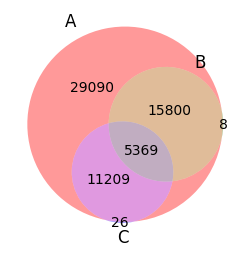

time: 1.04 s (started: 2023-06-27 12:11:43 -07:00)


In [21]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# names = ['main_view']
names = []
sets = []
# sets.append(set(main_view['id'].compute()))
for view_key in [('trange',), ('file_name',), ('proc_name',)]:
    names.append('_'.join(view_key) if isinstance(view_key, tuple) else view_key)
    sets.append(set(views[view_key]['id'].compute()))

plt.figure(figsize=(5,3))
venn3(sets)
plt.show()

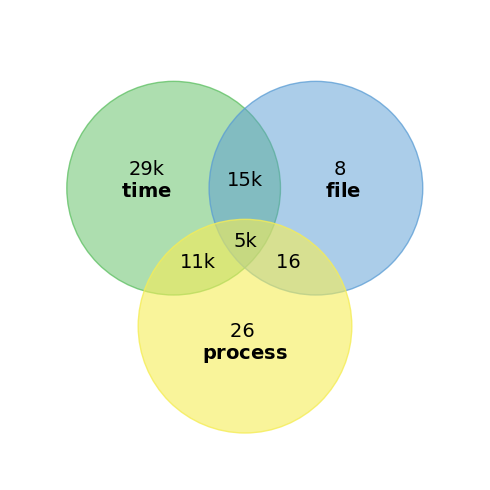

time: 1.18 s (started: 2023-06-27 12:33:49 -07:00)


In [63]:
import venn

# names2 = ['main_view']
names2 = []
sets2 = []
# sets2.append(set(main_view['id'].compute()))
for view_key in [('trange',), ('file_name',), ('proc_name',)]:
    names2.append('_'.join(view_key) if isinstance(view_key, tuple) else view_key)
    sets2.append(set(views[view_key]['id'].compute()))

labels = venn.get_labels(sets2)
fixed_labels = {}
for label in labels:
    label_val = int(labels[label])
    if label_val > 1000:
        fixed_labels[label] = f"{label_val // 1000}k"
    else:
        fixed_labels[label] = labels[label]
fixed_labels['001'] = f"{fixed_labels['001']}\n" + r"$\bf{process}$"
fixed_labels['010'] = f"{fixed_labels['010']}\n" + r"$\bf{file}$"
fixed_labels['100'] = f"{fixed_labels['100']}\n" + r"$\bf{time}$"
# plt.figure(figsize=(5,3))
fig, ax = venn.venn3(fixed_labels, names=names2, figsize=(5,5))
ax.get_legend().remove()
# fig.tight_layout()
fig.tight_layout()


In [39]:
labels

{'001': '26 ',
 '010': '8 ',
 '011': '16 ',
 '100': '29090 ',
 '101': '11209 ',
 '110': '15800 ',
 '111': '5369 '}

time: 4.38 ms (started: 2023-06-27 12:21:05 -07:00)


In [20]:
# coding: utf-8
from itertools import chain
try:
    # since python 3.10
    from collections.abc import Iterable
except ImportError:
    from collections import Iterable
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors
import math

default_colors = [
    # r, g, b, a
    [92, 192, 98, 0.5],
    [90, 155, 212, 0.5],
    [246, 236, 86, 0.6],
    [241, 90, 96, 0.4],
    [255, 117, 0, 0.3],
    [82, 82, 190, 0.2],
]
default_colors = [
    [i[0] / 255.0, i[1] / 255.0, i[2] / 255.0, i[3]]
    for i in default_colors
]

def draw_ellipse(fig, ax, x, y, w, h, a, fillcolor):
    e = patches.Ellipse(
        xy=(x, y),
        width=w,
        height=h,
        angle=a,
        color=fillcolor)
    ax.add_patch(e)

def draw_triangle(fig, ax, x1, y1, x2, y2, x3, y3, fillcolor):
    xy = [
        (x1, y1),
        (x2, y2),
        (x3, y3),
    ]
    polygon = patches.Polygon(
        xy=xy,
        closed=True,
        color=fillcolor)
    ax.add_patch(polygon)

def draw_text(fig, ax, x, y, text, color=[0, 0, 0, 1], fontsize=14, ha="center", va="center"):
    ax.text(
        x, y, text,
        horizontalalignment=ha,
        verticalalignment=va,
        fontsize=fontsize,
        color="black")

def draw_annotate(fig, ax, x, y, textx, texty, text, color=[0, 0, 0, 1], arrowcolor=[0, 0, 0, 0.3]):
    plt.annotate(
        text,
        xy=(x, y),
        xytext=(textx, texty),
        arrowprops=dict(color=arrowcolor, shrink=0, width=0.5, headwidth=8),
        fontsize=14,
        color=color,
        xycoords="data",
        textcoords="data",
        horizontalalignment='center',
        verticalalignment='center'
    )

def get_labels(data, fill=["number"]):
    """
    get a dict of labels for groups in data

    @type data: list[Iterable]
    @rtype: dict[str, str]

    input
      data: data to get label for
      fill: ["number"|"logic"|"percent"]

    return
      labels: a dict of labels for different sets

    example:
    In [12]: get_labels([range(10), range(5,15), range(3,8)], fill=["number"])
    Out[12]:
    {'001': '0',
     '010': '5',
     '011': '0',
     '100': '3',
     '101': '2',
     '110': '2',
     '111': '3'}
    """

    N = len(data)

    sets_data = [set(data[i]) for i in range(N)]  # sets for separate groups
    s_all = set(chain(*data))                     # union of all sets

    # bin(3) --> '0b11', so bin(3).split('0b')[-1] will remove "0b"
    set_collections = {}
    for n in range(1, 2**N):
        key = bin(n).split('0b')[-1].zfill(N)
        value = s_all
        sets_for_intersection = [sets_data[i] for i in range(N) if  key[i] == '1']
        sets_for_difference = [sets_data[i] for i in range(N) if  key[i] == '0']
        for s in sets_for_intersection:
            value = value & s
        for s in sets_for_difference:
            value = value - s
        set_collections[key] = value

    labels = {k: "" for k in set_collections}
    if "logic" in fill:
        for k in set_collections:
            labels[k] = k + ": "
    if "number" in fill:
        for k in set_collections:
            labels[k] += str(len(set_collections[k]))
    if "percent" in fill:
        data_size = len(s_all)
        for k in set_collections:
            labels[k] += "(%.1f%%)" % (100.0 * len(set_collections[k]) / data_size)

    return labels

def venn2(labels, names=['A', 'B'], **options):
    """
    plots a 2-set Venn diagram

    @type labels: dict[str, str]
    @type names: list[str]
    @rtype: (Figure, AxesSubplot)

    input
      labels: a label dict where keys are identified via binary codes ('01', '10', '11'),
              hence a valid set could look like: {'01': 'text 1', '10': 'text 2', '11': 'text 3'}.
              unmentioned codes are considered as ''.
      names:  group names
      more:   colors, figsize, dpi, fontsize

    return
      pyplot Figure and AxesSubplot object
    """
    colors = options.get('colors', [default_colors[i] for i in range(2)])
    figsize = options.get('figsize', (9, 7))
    dpi = options.get('dpi', 96)
    fontsize = options.get('fontsize', 14)

    fig = plt.figure(0, figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_axis_off()
    ax.set_ylim(bottom=0.0, top=0.7)
    ax.set_xlim(left=0.0, right=1.0)

    # body
    draw_ellipse(fig, ax, 0.375, 0.3, 0.5, 0.5, 0.0, colors[0])
    draw_ellipse(fig, ax, 0.625, 0.3, 0.5, 0.5, 0.0, colors[1])
    draw_text(fig, ax, 0.74, 0.30, labels.get('01', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.26, 0.30, labels.get('10', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.30, labels.get('11', ''), fontsize=fontsize)

    # legend
    draw_text(fig, ax, 0.20, 0.56, names[0], colors[0], fontsize=fontsize, ha="right", va="bottom")
    draw_text(fig, ax, 0.80, 0.56, names[1], colors[1], fontsize=fontsize, ha="left", va="bottom")
    leg = ax.legend(names, loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
    leg.get_frame().set_alpha(0.5)

    return fig, ax

def venn3(labels, names=['A', 'B', 'C'], **options):
    """
    plots a 3-set Venn diagram

    @type labels: dict[str, str]
    @type names: list[str]
    @rtype: (Figure, AxesSubplot)

    input
      labels: a label dict where keys are identified via binary codes ('001', '010', '100', ...),
              hence a valid set could look like: {'001': 'text 1', '010': 'text 2', '100': 'text 3', ...}.
              unmentioned codes are considered as ''.
      names:  group names
      more:   colors, figsize, dpi, fontsize

    return
      pyplot Figure and AxesSubplot object
    """
    colors = options.get('colors', [default_colors[i] for i in range(3)])
    figsize = options.get('figsize', (9, 9))
    dpi = options.get('dpi', 96)
    fontsize = options.get('fontsize', 14)

    fig = plt.figure(0, figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_axis_off()
    ax.set_ylim(bottom=0.0, top=1.0)
    ax.set_xlim(left=0.0, right=1.0)

    # body
    draw_ellipse(fig, ax, 0.333, 0.633, 0.6, 0.6, 0.0, colors[0]) 
    draw_ellipse(fig, ax, 0.666, 0.633, 0.6, 0.6, 0.0, colors[1])
    draw_ellipse(fig, ax, 0.500, 0.310, 0.6, 0.6, 0.0, colors[2])
    draw_text(fig, ax, 0.50, 0.27, labels.get('001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.73, 0.65, labels.get('010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.61, 0.4, labels.get('011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.27, 0.65, labels.get('100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.39, 0.4, labels.get('101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.65, labels.get('110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.5, labels.get('111', ''), fontsize=fontsize)

#     {
#  '011': '16',

#  '101': '11209',

#  '111': '5369'}

    # legend
    # draw_text(fig, ax, 0.15, 0.87, names[0], colors[0], fontsize=fontsize, ha="right", va="bottom")
    # draw_text(fig, ax, 0.85, 0.87, names[1], colors[1], fontsize=fontsize, ha="left", va="bottom")
    # draw_text(fig, ax, 0.50, 0.02, names[2], colors[2], fontsize=fontsize, va="top")
    # leg = ax.legend(names, loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
    # leg.get_frame().set_alpha(0.5)

    return fig, ax

def venn4(labels, names=['A', 'B', 'C', 'D'], **options):
    """
    plots a 4-set Venn diagram

    @type labels: dict[str, str]
    @type names: list[str]
    @rtype: (Figure, AxesSubplot)

    input
      labels: a label dict where keys are identified via binary codes ('0001', '0010', '0100', ...),
              hence a valid set could look like: {'0001': 'text 1', '0010': 'text 2', '0100': 'text 3', ...}.
              unmentioned codes are considered as ''.
      names:  group names
      more:   colors, figsize, dpi, fontsize

    return
      pyplot Figure and AxesSubplot object
    """
    colors = options.get('colors', [default_colors[i] for i in range(4)])
    figsize = options.get('figsize', (12, 12))
    dpi = options.get('dpi', 96)
    fontsize = options.get('fontsize', 14)

    fig = plt.figure(0, figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_axis_off()
    ax.set_ylim(bottom=0.0, top=1.0)
    ax.set_xlim(left=0.0, right=1.0)

    # body
    draw_ellipse(fig, ax, 0.350, 0.400, 0.72, 0.45, 140.0, colors[0])
    draw_ellipse(fig, ax, 0.450, 0.500, 0.72, 0.45, 140.0, colors[1])
    draw_ellipse(fig, ax, 0.544, 0.500, 0.72, 0.45, 40.0, colors[2])
    draw_ellipse(fig, ax, 0.644, 0.400, 0.72, 0.45, 40.0, colors[3])
    draw_text(fig, ax, 0.85, 0.42, labels.get('0001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.68, 0.72, labels.get('0010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.77, 0.59, labels.get('0011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.32, 0.72, labels.get('0100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.71, 0.30, labels.get('0101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.66, labels.get('0110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.65, 0.50, labels.get('0111', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.14, 0.42, labels.get('1000', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.17, labels.get('1001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.29, 0.30, labels.get('1010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.39, 0.24, labels.get('1011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.23, 0.59, labels.get('1100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.61, 0.24, labels.get('1101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.35, 0.50, labels.get('1110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.38, labels.get('1111', ''), fontsize=fontsize)

    # legend
    draw_text(fig, ax, 0.13, 0.18, names[0], colors[0], fontsize=fontsize, ha="right")
    draw_text(fig, ax, 0.18, 0.83, names[1], colors[1], fontsize=fontsize, ha="right", va="bottom")
    draw_text(fig, ax, 0.82, 0.83, names[2], colors[2], fontsize=fontsize, ha="left", va="bottom")
    draw_text(fig, ax, 0.87, 0.18, names[3], colors[3], fontsize=fontsize, ha="left", va="top")
    leg = ax.legend(names, loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
    leg.get_frame().set_alpha(0.5)

    return fig, ax


time: 11.6 ms (started: 2023-06-27 12:47:17 -07:00)


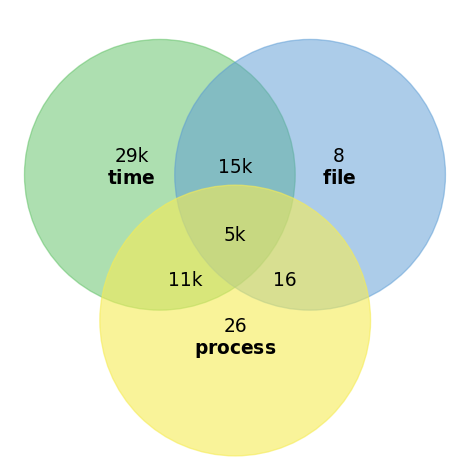

time: 1.02 s (started: 2023-06-27 12:48:11 -07:00)


In [23]:


# names2 = ['main_view']
names2 = []
sets2 = []
# sets2.append(set(main_view['id'].compute()))
for view_key in [('trange',), ('file_name',), ('proc_name',)]:
    names2.append('_'.join(view_key) if isinstance(view_key, tuple) else view_key)
    sets2.append(set(views[view_key]['id'].compute()))

labels = get_labels(sets2)
fixed_labels = {}
for label in labels:
    label_val = int(labels[label])
    if label_val > 1000:
        fixed_labels[label] = f"{label_val // 1000}k"
    else:
        fixed_labels[label] = labels[label]
fixed_labels['001'] = f"{fixed_labels['001']}\n" + r"$\bf{process}$"
fixed_labels['010'] = f"{fixed_labels['010']}\n" + r"$\bf{file}$"
fixed_labels['100'] = f"{fixed_labels['100']}\n" + r"$\bf{time}$"
# plt.figure(figsize=(5,3))
fig, ax = venn3(fixed_labels, names=names2, figsize=(5,5), dpi=96)
# ax.get_legend().remove()
# fig.tight_layout()
fig.tight_layout()


- DPI has to be 300
- Create Venn diagram for 6 apps
- Create PDFs (using PDF crop)

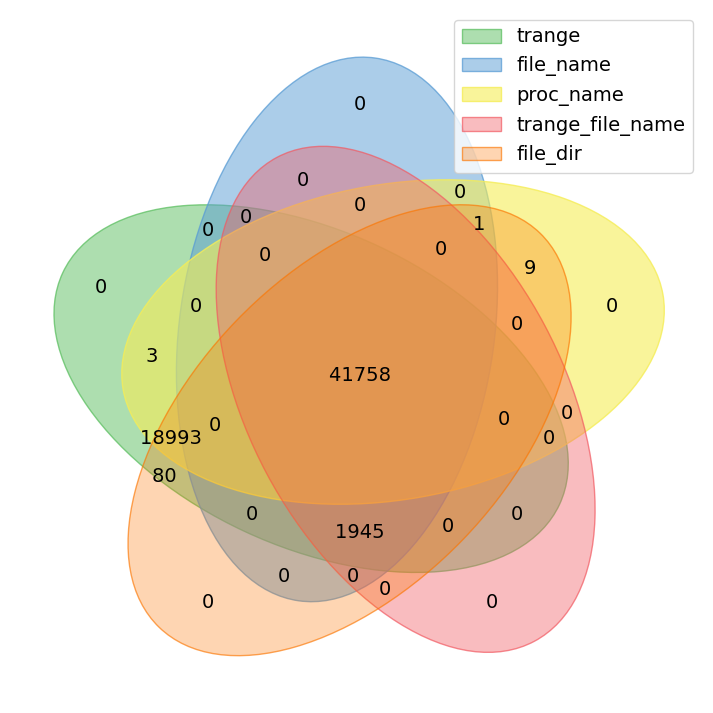

time: 3.21 s (started: 2023-06-27 11:08:41 -07:00)


In [10]:
import venn

# names2 = ['main_view']
names2 = []
sets2 = []
# sets2.append(set(main_view['id'].compute()))
for view_key in [('trange',), ('file_name',), ('proc_name',), ('trange', 'file_name'), ('file_dir',)]:
    names2.append('_'.join(view_key) if isinstance(view_key, tuple) else view_key)
    sets2.append(set(views[view_key]['id'].compute()))

labels = venn.get_labels(sets2)
fig, ax = venn.venn5(labels, names=names2)
fig.show()